
# Individual Homework: Data Preparation and Exploratory Analysis

**Due:** 21 Sep 2025, 11:59 pm (SGT)  
**Submission:** Single `your_name_assignment1.ipynb` file uploaded to Canvas


## Student details
Fill this in before you start.

- Student ID: e1291558


## 0. Set-up

In [122]:

# Import packages you need. Keep to the standard stack where possible.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# If you need scikit-learn later, you can import it when required.
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.impute import SimpleImputer
# from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# Display options for readability
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)

# Set a seed for any random processes used later
SEED = 42
np.random.seed(SEED)
print('Set-up complete.')


Set-up complete.


## 1. Load the dataset

In [123]:
# The dataset dummy_homework_dataset.csv has been provided for you.
# It must be used for this homework assignment.

csv_path = 'tcx3213_assignment1_dataset.csv'  # This is the provided dataset file

# Load the dataset
# HINT: Use the appropriate pandas function to read the CSV file into a dataframe
df = pd.read_csv(csv_path)
# HINT: After loading, display the first few rows to check if the dataset loaded correctly
print(df.head())

   CustomerID   Age  Annual_Income  Spending_Score Satisfaction_Level Region  Membership_Years  Churn
0           1   NaN  104292.283556               2                NaN   West                 7      0
1           2  69.0   75250.318361              27                NaN   West                 5      0
2           3  46.0   10812.355744              95                NaN   East                11      0
3           4   NaN  113059.994568              36                low  North                10      0
4           5   NaN  184474.671499              36               high  South                 9      0


In [124]:
# Quick structure check
# HINT: Write code to display a concise summary of the dataframe, including column names, data types, and non-null counts
print(df.info())
# HINT: Write code to display summary statistics for both numeric and non-numeric columns in a table format
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          600 non-null    int64  
 1   Age                 540 non-null    float64
 2   Annual_Income       540 non-null    float64
 3   Spending_Score      600 non-null    int64  
 4   Satisfaction_Level  540 non-null    object 
 5   Region              600 non-null    object 
 6   Membership_Years    600 non-null    int64  
 7   Churn               600 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 37.6+ KB
None
       CustomerID         Age  Annual_Income  Spending_Score  Membership_Years       Churn
count  600.000000  540.000000     540.000000      600.000000        600.000000  600.000000
mean   300.500000   44.168519   78273.024396       50.423333          7.045000    0.201667
std    173.349358   14.996578   89027.829788       28.931052     


### 1.1 Basic dataset notes
Briefly describe:
- What each column represents (in your own words)
    - `CustomerID` is the identification number for customer.
    - `Age` represents the age of the customer.
    - `Annual_Income` is the income earned by the customer per year.
    - `Spending_Score` is the score that represents the customer spending.
    - `Satisfaction_Level` is the categorical value represents the customer satisfaction level.
    - `Region` is the categorical value represents customer's region.
    - `Membership_Years` is number of the year since customer becomes the member.
    - `Churn` is a numeric flag to indicate customer churn.
- The size of the dataset (rows and columns)
    - It has 600 rows and 8 columns.
- Any obvious data quality issues you notice at first glance
    - Some columns have missing data: `Age`,`Satisfaction_Level` and `Region`.
    - `Churn` is better represented by categorical data instead of numeric data because it has only 2 states.


## 2. Exploratory data analysis (EDA)

In [125]:
# Identify numeric and categorical columns
# HINT: Write code to select columns with numeric data types and store them in a list
# HINT: Write code to select columns with non-numeric (categorical) data types and store them in a list
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()

# Print your lists to confirm
# HINT: Write code to print the names of numeric columns
print(numeric_columns)
# HINT: Write code to print the names of categorical columns
print(categorical_columns)

['CustomerID', 'Age', 'Annual_Income', 'Spending_Score', 'Membership_Years', 'Churn']
['Satisfaction_Level', 'Region']


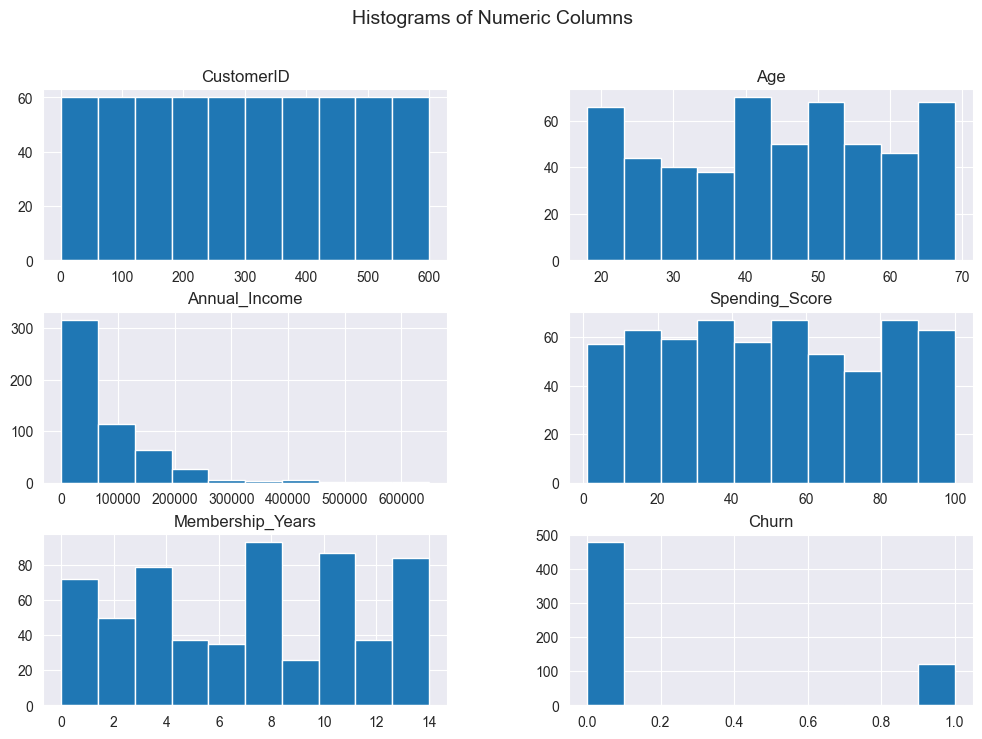

In [126]:
# Plot distributions for numeric columns
# HINT: Loop through each numeric column in your list
# HINT: For each column, create a new figure
# HINT: Plot a histogram for the column with a suitable number of bins
# HINT: Add a title showing the column name
# HINT: Label the x-axis and y-axis clearly
# HINT: Display the plot
numeric_df = df.select_dtypes(include=np.number)
numeric_df.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numeric Columns', fontsize=14) # Add a main title
plt.show()

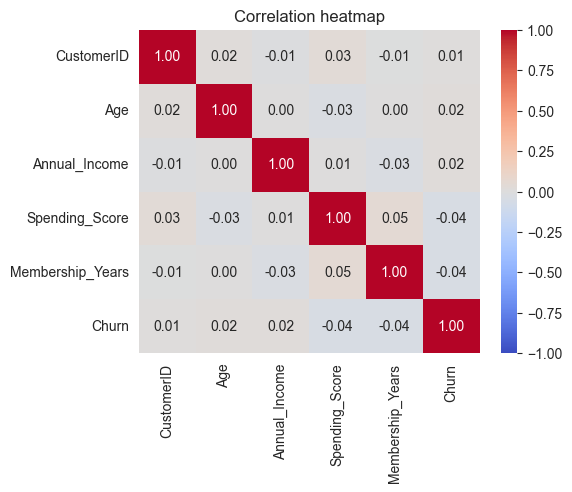

In [127]:
# Basic bivariate exploration (example: correlation heatmap for numeric columns)
# HINT: Compute the correlation matrix for all numeric columns in the dataframe
# HINT: Create a new figure for the heatmap
# HINT: Use a plotting function to display the correlation matrix as a heatmap
# HINT: Add a colour bar to show correlation strength
# HINT: Set the title of the plot
# HINT: Add x-axis and y-axis tick labels using column names, rotated for readability
# HINT: Adjust the layout so labels and the heatmap fit nicely
# HINT: Display the final heatmap
corr = numeric_df.corr()
plt.figure(figsize=(5.5, 4.2))
sns.heatmap(
    corr,
    annot=True,       # show correlation values
    cmap="coolwarm",  # blue for negative, red for positive
    fmt=".2f",        # format numbers with 2 decimals
    vmin=-1, vmax=1   # fix scale from -1 to 1
)
plt.title("Correlation heatmap")
plt.show()


### 2.1 Notes from EDA
Summarise key observations:
- Which variables are skewed or have outliers
    - `Annual_Income` and `Churn` are skewed. The majority of `Annual_Income` lies below 100000 and most of `Churn` are 0.
- Obvious relationships or lack of relationships
    - `CustomerID` lacks relationships with other variables because it's unique and random assigned.
    - `Age` has positive relationships with `Churn` and negative relationships with `Spending_Score`
    - `Annual_Income` has positive relationships with `Spending_Score` and `Churn`, negative relationship with `Membership_Years`.
    - `Spending_Score` has positive relationships with `Membership_Years` and negative relationship with `Churn`
    - `Membership_Years` has negative relationship with `Churn`
- Potential target variable if you choose to build a tiny baseline model later (optional)
    - `Churn` has higher value over other variables and the accurate predication can lead to custom marketing strategy to reduce the customers' attrition.

## 3. Missing data analysis and handling

In [128]:
# Check overall missingness
# HINT: Calculate the number of missing values in each column
# HINT: Sort the missing value counts from highest to lowest
# HINT: Compute the percentage of missing values for each column
# HINT: Combine both counts and percentages into a single summary table for easy viewing



### Plan your approach
For each feature with missing values, write your plan:
- Impute with mean or median for numeric with mild skew
- Impute with mode for categorical
- Consider more suitable methods if needed
Explain your choice briefly.


In [129]:
# Example skeleton for applying simple imputations

# HINT: Decide on a strategy for imputing missing numeric values (e.g., mean or median)
# HINT: Decide on a strategy for imputing missing categorical values (e.g., most frequent)

# HINT: Loop through each numeric column
# HINT: If the column has missing values, replace them using the chosen numeric strategy

# HINT: Loop through each categorical column
# HINT: If the column has missing values, replace them using the chosen categorical strategy

# HINT: You can use pandas fillna() or sklearn SimpleImputer for this step


## 4. Encoding categorical variables

In [130]:
# Identify ordinal columns that have a natural order
# HINT: Look at your categorical columns and decide which ones have an inherent order (e.g., low < medium < high)
# HINT: Create a mapping dictionary to assign numeric values based on the order you identified
# HINT: Apply the mapping to transform the ordinal column into numeric form

# One-hot encoding for nominal columns
# HINT: For categorical columns without natural order, use one-hot encoding to create dummy variables
# HINT: Decide whether to drop the first category to avoid multicollinearity



Explain your encoding choices:
- Which columns were treated as ordinal and why
- Which columns were one-hot encoded and why
- Any categories you combined or cleaned


## 5. Scaling, normalisation, and transformation

In [131]:
# Inspect skewness
# HINT: Calculate the skewness for each numeric column in the dataframe
# HINT: Sort the skewness values in descending order to see which columns are most skewed
# HINT: Decide which columns might need transformations based on their skewness values

# Apply transformations where helpful (example: log1p for positive skew)
# HINT: Loop through each numeric column
# HINT: For columns with strong positive skew, apply a suitable transformation (e.g., log1p) to reduce skewness
# HINT: Create new transformed columns rather than overwriting original columns


In [132]:
# Scaling example placeholders
# HINT: Decide whether to use standardisation (StandardScaler) or normalisation (MinMaxScaler) based on your analysis needs
# HINT: Create a copy of your dataframe before applying scaling
# HINT: Apply the scaler to the numeric columns only
# HINT: Check the first few rows of the scaled dataframe to confirm changes



Briefly justify your choices:
- Which columns you transformed and why
- Which scaling method you used and why


## 6. Feature selection (basic)

In [133]:
# Filter-based selection examples

# Option A: remove highly correlated features
# HINT: Calculate the absolute correlation matrix for numeric columns
# HINT: Extract the upper triangle of the correlation matrix to avoid duplicates
# HINT: Identify columns with correlation above a chosen threshold (e.g., 0.9)
# HINT: Drop the highly correlated columns from the dataframe

# Option B: mutual information (choose appropriate function for your target type)
# HINT: Choose the correct mutual information function based on the target type
#       - mutual_info_regression for continuous targets
#       - mutual_info_classif for categorical targets
# HINT: Apply mutual information to all features except the target column
# HINT: Rank features by their MI scores and decide which ones to keep



Write a short note describing the selected features and why they are suitable.


## 7. Conclusions

Summarise what you did and learned. State any assumptions or limitations.


Write your conclusions here.

## Marking rubrics

### Summary rubric (100 marks)

| Section                        | Criteria                                                                                          | Marks |
|--------------------------------|---------------------------------------------------------------------------------------------------|-------|
| 0. Set-up                       | Clean imports, seed set, readable options                                                        | 5     |
| 1. Load and describe             | Correct load, preview, clear description of columns, correct data types description              | 10    |
| 2. EDA                           | Correct identification of numeric and categorical, sensible plots, correct observations about skewness and relationships | 20    |
| 3. Missing data                  | Accurate audit, reasonable plan, correct implementation, justification                           | 20    |
| 4. Encoding                      | Correct identification of ordinal vs nominal, appropriate encodings, explanation                 | 15    |
| 5. Scaling and transformation    | Correct skew checks, reasonable use of transformations, correct scaling choice with justification | 15    |
| 6. Feature selection             | Correct method, coherent threshold or MI use, clear explanation                                  | 10    |
| 7. Conclusions                   | Clear summary and limitations                                                                    | 5     |




### Detailed rubrics

| Section                     | Excellent                                                                                                         | Satisfactory                                    | Needs work                             | Common pitfalls                                                        |
|-----------------------------|-------------------------------------------------------------------------------------------------------------------|------------------------------------------------|----------------------------------------|------------------------------------------------------------------------|
| 1. Load and describe         | Loads correctly, concise but informative column descriptions, correct dtype commentary                           | Loads correctly with brief notes                | Loads with errors or missing notes      | Forgetting to set the correct file name, no info() or describe()         |
| 2. EDA                       | All relevant plots, clear notes on skew and outliers, simple correlation heatmap                                  | Some plots, some comments                        | Minimal plots, little commentary        | Plotting unreadable figures, no labels or titles                         |
| 3. Missing data              | Complete audit table, choices justified by type and distribution, implementation correct                         | Partial audit, basic fill rules used             | Incomplete audit, unjustified methods   | Imputing strings with numeric strategies, leaving NaN without explanation|
| 4. Encoding                  | Correct ordinal maps, appropriate one-hot, clear rationale                                                        | Mostly correct encodings                         | Incorrect or unexplained encodings       | Treating nominal as ordinal, exploding cardinality without discussion    |
| 5. Scaling and transformation| Sound skew checks, appropriate transforms, correct scaler choice and reasoning                                   | Some transforms or scaling with basic reasoning | Misapplied transforms or no reasoning    | Applying log to zeros or negatives, scaling before fixing missing values |
| 6. Feature selection         | Method well explained, threshold or mutual information (MI) sensibly chosen, clean reduced set                                         | Some selection with light explanation            | No clear method or arbitrary drops        | Using target leakage, dropping at random                                 |
| 7. Conclusions               | Clear synthesis, limitations acknowledged                                                                        | Basic summary                                   | Vague or missing                        | No link between steps and conclusions                                    |
